# Algorithms Final Project

Submitted by: Joon (John) Choi, Cole Gvozdas, Spencer Kuldell, Ronan Manvelian

In [3]:
# import libraries
import math
import random
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Define classes we will be using to pre-process our data

In [4]:
# stores information of each street
class Street:

    def __init__(self, startNode, endNode, length):
        self.attributes = {}
        self.attributes['start'] = startNode
        self.attributes['end'] = endNode
        self.attributes['length'] = length

    def __str__(self):
        return str(self.attributes)

    def set(self, key, value):
        self.attributes[key] = value

    def get(self, key):
        return self.attributes[key]


# stores information for each car and its path
class Car:
    
    def __init__(self, pathLength, path):
        self.attributes = {}
        self.attributes['pathLength'] = pathLength
        self.attributes['path'] = path

    def __str__(self):
        return str(self.attributes)

    def set(self, key, value):
        self.attributes[key] = value

    def get(self, key):
        return self.attributes[key]

## Load data / Data Pre-processing

In [5]:
# This places all car paths and streets from hashcode.in input file into appropriate data structures
# eg) streets: 'a-e' --> Street(0, 4, 40) & cars: Car(4, 'a-e e-f f-d d-b')
with open('hashcode.in') as f:
    lines = f.readlines()
duration, numNodes, numStreets, numCars, bonus = [
    int(x) for x in lines.pop(0).split()]

# We can see how many nodes and edges there are in the Directed Weighted Graph, along with the number of cars traveling
print("Number of nodes: ", numNodes)
print("Number of edges: ", numStreets)
print("Number of cars: ", numCars)

# Line by line, we can consolidate every street (two nodes connected by an edge) into a dictionary with object-oriented programming
streets = {}
for _ in range(numStreets):
    line = lines.pop(0).split()
    start = int(line[0])
    end = int(line[1])
    street_name = line[2]
    length = int(line[-1])
    streets[street_name] = Street(start, end, length)

# Same thing can be done to consolidate every car
cars = []
for _ in range(numCars):
    line = lines.pop(0).split()
    pathLength = int(line[0])
    path = line[1:]
    cars.append(Car(pathLength, path))

Number of nodes:  8000
Number of edges:  63968
Number of cars:  1000


## Construct Floyd-Warshall Algorithm

In [ ]:
# In order to find the shortest path for all pairs of nodes in the graph, we will be implementing the Floyd-Warshall algorithm
# We will be comparing all possible paths through the graph between each pair of vertices, which will run in O(|V|^3)
# Initialize a nxn table to keep track of shortest path between pairs, where n is the number of nodes/vertices
table = [[math.inf for i in range(numNodes)] for j in range(numNodes)]

# Zero value across the diagonal; zero distance to itself
for node in range(numNodes):
    table[node][node] = 0

# Assign distance values between pairs of nodes from the given input data
for street, attributes in streets.items():
    start_node = attributes.get('start')
    end_node = attributes.get('end')
    distance = attributes.get('length')
    table[start_node][end_node] = distance

# Floyd-Warshall Algorithm O(|V|^3)
for i in range(numNodes):
    for j in range(numNodes):
        for k in range(numNodes):
            if table[j][k] > table[j][i]+table[i][k]:
                table[j][k] == table[j][i]+table[i][k]

Given that we have 8000 nodes with 63968 edges in the Directed Weighted Graph, our computers do not possess enough processing power to run the algorithm.

In order to compromise, we can run the algorithm with a smaller sample size by constructing a graph around the given car paths.

## Random Sampling - Smaller Sample Size

We can random sample 20 cars to start with a smaller sample size of nodes/edges for our new graph.
Since we will be using a different set of nodes/edges, we have to re-index our data before setting up the table.

In [6]:
sampleNodes = set()
sampleEdges = set()

sampleCars = random.sample(cars, 20)
for car in sampleCars:
    for path in car.get('path'):
        start_end = path.split('-')
        if start_end[0] not in sampleNodes:
            sampleNodes.add(start_end[0])
        if start_end[1] not in sampleNodes:
            sampleNodes.add(start_end[1])
        if path not in sampleEdges:
            sampleEdges.add(path)

sampleNodes = sorted(list(sampleNodes))

indexMap = {}
mapCounter = 0
for node in sampleNodes:
    indexMap[node] = mapCounter
    mapCounter += 1

print(f"Number of nodes in reduced graph (20 cars): {len(sampleNodes)}")
print(f"Number of edges in reduced graph (20 cars): {len(sampleEdges)}")

Number of nodes in reduced graph (20 cars): 1880
Number of edges in reduced graph (20 cars): 2353


## Re-construct Floyd-Warshall Algorithm (Smaller Sample Size of 20 cars)

In [7]:
# Now we can build a smaller table and re-run the Floyd-Warshall Algorithm
sampleTable = [[math.inf for i in range(len(sampleNodes))] for j in range(len(sampleNodes))]

# Zero value across the diagonal; zero distance to itself
for node in range(len(sampleNodes)):
    sampleTable[node][node] = 0

# Assign distance values between pairs of nodes from the given input data
for i in range(len(sampleCars)):
    for j in range(len(sampleCars[i].get('path'))):
        car_ij = sampleCars[i].get('path')[j].split('-')
        sampleTable[indexMap[car_ij[0]]][indexMap[car_ij[1]]] = streets[sampleCars[i].get('path')[j]].get('length')

# Floyd-Warshall Algorithm O(|V|^3)
for i in range(len(sampleNodes)):
    for j in range(len(sampleNodes)):
        for k in range(len(sampleNodes)):
            if sampleTable[j][k] > sampleTable[j][i]+sampleTable[i][k]:
                sampleTable[j][k] == sampleTable[j][i]+sampleTable[i][k]

# Distance Comparison

In [14]:
distance_orig = 0
distance_opt = 0
car_counter = 0

for car in sampleCars:
    for path in car.get('path'):
        distance_orig += streets[path].get('length')
        start_end = path.split('-')
        distance_opt += sampleTable[indexMap[start_end[0]]][indexMap[start_end[1]]]
    car_counter += 1
    print(f"Car #{car_counter} \n original distance: {distance_orig}, shortest distance: {distance_opt} \n") 

Car #1 
 original distance: 3156, shortest distance: 3156 

Car #2 
 original distance: 6414, shortest distance: 6414 

Car #3 
 original distance: 9630, shortest distance: 9630 

Car #4 
 original distance: 12516, shortest distance: 12516 

Car #5 
 original distance: 15841, shortest distance: 15841 

Car #6 
 original distance: 18909, shortest distance: 18909 

Car #7 
 original distance: 22101, shortest distance: 22101 

Car #8 
 original distance: 25117, shortest distance: 25117 

Car #9 
 original distance: 28372, shortest distance: 28372 

Car #10 
 original distance: 31542, shortest distance: 31542 

Car #11 
 original distance: 34663, shortest distance: 34663 

Car #12 
 original distance: 37900, shortest distance: 37900 

Car #13 
 original distance: 40957, shortest distance: 40957 

Car #14 
 original distance: 44109, shortest distance: 44109 

Car #15 
 original distance: 47010, shortest distance: 47010 

Car #16 
 original distance: 49877, shortest distance: 49877 

Car #17

Results show that there weren't any improvements with the randomly sampled 20 cars and there are two possible explanations:

1) The paths given from our input data for the twenty cars are in fact the shortest paths between their start/end node

2) The paths selected to construct the subgraph do not include optimal streets for the cars to traverse a shorter path

## Graph Visualization

We can use a python library called `networkx` to visualize our traffic map.

In [15]:
# Create an adjacency List with sampled cars
carPaths = {}

for car in sampleCars:
  for path in car.get('path'):
    start_end = path.split('-')
    if start_end[0] not in carPaths:
      carPaths[start_end[0]] = []
    carPaths[start_end[0]].append(start_end[1])

In [16]:
# Create lists to enter for input/output values of the graph

from_nodes = []
to_nodes = []
checked = set()

for start, endpoints in carPaths.items():
  for endpoint in endpoints:
    if (start, endpoint) not in checked:
      from_nodes.append(start)
      to_nodes.append(endpoint)
      checked.add((start, endpoint))

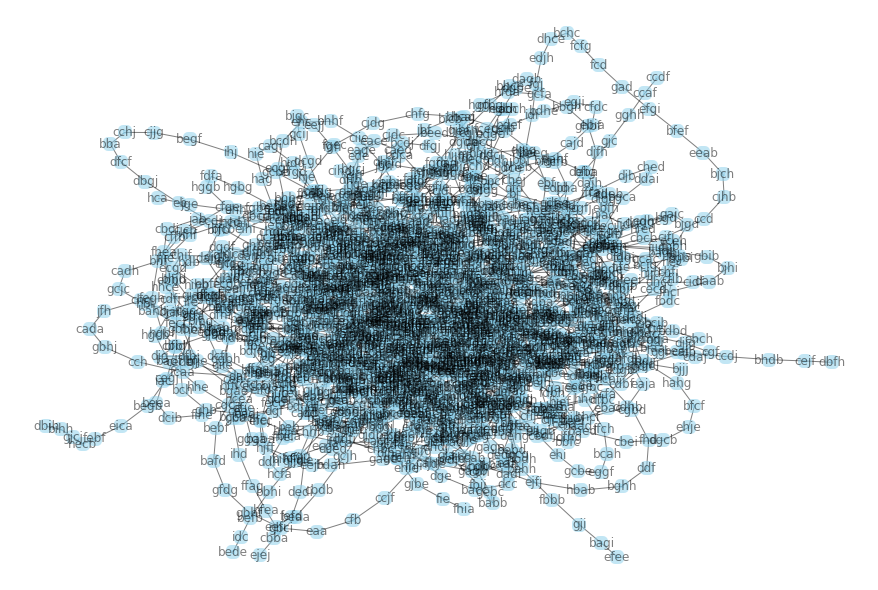

In [17]:
# Build a dataframe with your connections
df = pd.DataFrame({ 'from': from_nodes, 'to': to_nodes})
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Graph with Custom nodes:
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=20, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=10)
plt.show()

Let's try creating a graph with fewer cars (first 10 cars / 5 cars)

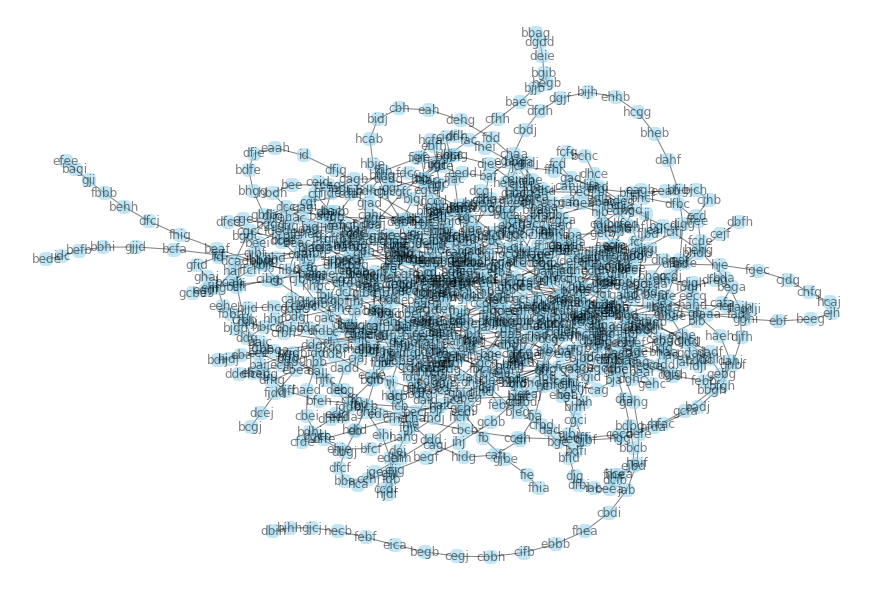

In [18]:
# Adjacency List with first 10 cars
paths = {}

for car in sampleCars[:10]:
  for path in car.get('path'):
    start_end = path.split('-')
    if start_end[0] not in paths:
      paths[start_end[0]] = []
    paths[start_end[0]].append(start_end[1])

from_nodes = []
to_nodes = []
checked = set()

for start, endpoints in paths.items():
  for endpoint in endpoints:
    if (start, endpoint) not in checked:
      from_nodes.append(start)
      to_nodes.append(endpoint)
      checked.add((start, endpoint))
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from': from_nodes, 'to': to_nodes})
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Graph with Custom nodes:
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=20, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=10)
plt.show()

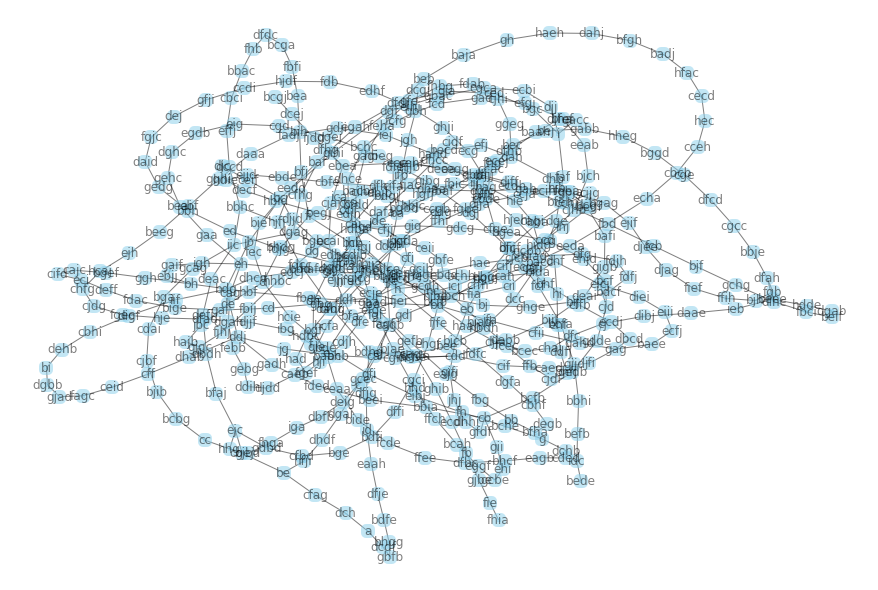

In [19]:
# Adjacency List with first 5 cars
paths = {}

for car in sampleCars[:5]:
  for path in car.get('path'):
    start_end = path.split('-')
    if start_end[0] not in paths:
      paths[start_end[0]] = []
    paths[start_end[0]].append(start_end[1])

from_nodes = []
to_nodes = []
checked = set()

for start, endpoints in paths.items():
  for endpoint in endpoints:
    if (start, endpoint) not in checked:
      from_nodes.append(start)
      to_nodes.append(endpoint)
      checked.add((start, endpoint))
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from': from_nodes, 'to': to_nodes})
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Graph with Custom nodes:
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=20, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=10)
plt.show()